In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import log
import random

In [3]:
# Coverting Original Image to Matrix of Pixels

def getImageMatrix(imageName): # Passing Image Path as parameter
    im = Image.open(imageName) 
    pix = im.load()
    
    # TO MAKE THE CODE UNIVERSAL TO WORK FOR ALL TYPES OF FILE FORMATS
    
    # We are checking if the pixels are in Integer format or Tuple Format
    flag = 1 # Used for checking if the Pixels are (RGB-Format which is a Tuple) or (Single Color Format which is Int)
    if type(pix[0,0]) == int:
      flag = 0
    
    image_size = im.size # Gives number of rows and columns as a tuple (row,column)
    image_matrix = []
    
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row) #[[1,2,3],[1,2,3]]
    
    # Instead of using the for loop we can use simple Numpy Function to convert Image to Matrix
    # image_matrix = np.array(imageName)
    return image_matrix,image_size[0],flag # returning Image Matrx, Row size, flag (Type of color format)

# Creating Image Matrix in Gray Scale 
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA') # this function reads an image into grayscale rather than color
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

The transform applied on the image is: R([x,y]) = [(x + y) mod n, (x + 2y) mod n] where n is the dimensions of the image

In [4]:
def ArnoldCatTransform(img, num):
    
    rows, cols, ch = img.shape # Getting image rows, columns and channels
    
    n = rows # Considering Square image n=rows=columns
    
    img_arnold = np.zeros([rows, cols, ch]) # Creating Zero Matrix of the image size which will be updated b Arnold's Cat Formula
    
    # Iterating over the rows and columns
    for x in range(0, rows):
        for y in range(0, cols):
            
            # Based on Arnold's Matrix Formula
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold # returning Arnold image i.e., after scrambling pixels with the formula

In [5]:
# Performing Arnold's Encryption 

# This is nothing but running the Arnold transform for a certain secuirty Key iterations 

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    
    for i in range (0,key): # Iterating for certain number of times
        img = ArnoldCatTransform(img, i) # After each iteration image is update 
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img # Final image after number of iterations are done, based on Secuirty Key

In [6]:
# Performing Arnold's Decryption

def ArnoldCatDecryption(imageName, key):
    
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    
    # First we need to find out the number of iteration required to obtain Original Image
    
    # Based on the Formula these are the methods to calculate iteration to obtai Original Image
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
        
    # We need to run the code from Key --> Number of iteration required to obtain Original Image
    
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [34]:
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero' # Path of the file Image
ext = ".png"
key = 20

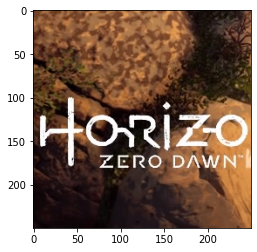

In [35]:
# Diplaying Original Image
img = cv2.imread(image + ext)

# OpenCv use BGR format 
# Matplotlib uses RGB format
# Hence we to convert format from one to another
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB) # Converting from BGR --> RGB
plt.imshow(img)
plt.show()

In [36]:
# Performing Encryption
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero' # Path of the file Image
ext = ".png"
key = 20
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)

(250, 250, 3)


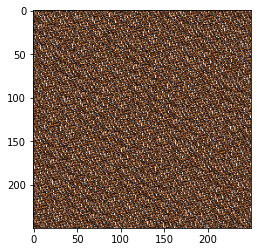

In [40]:
#Diplaying Encrypted Image
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero_ArnoldcatEnc.png'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA) # Converting from BGR --> RGB
plt.imshow(img.astype('uint8'))
plt.show()

In [43]:
# Performing Decryption
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero' # Path of the file Image
ext = ".png"
key = 20
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)

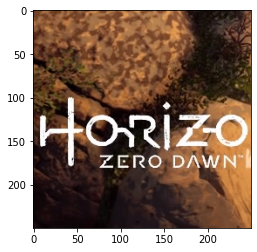

In [44]:
# Displaying Decrypted Image
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero_ArnoldcatDec.png'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA) # Converting from BGR --> RGB
plt.imshow(img.astype('uint8'))
plt.show()

# Histogram and Correlation Analysis

## Original Image

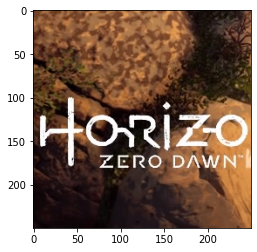

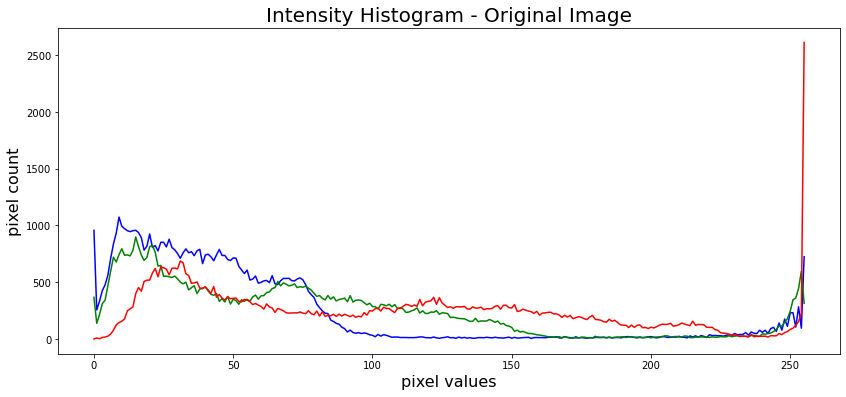

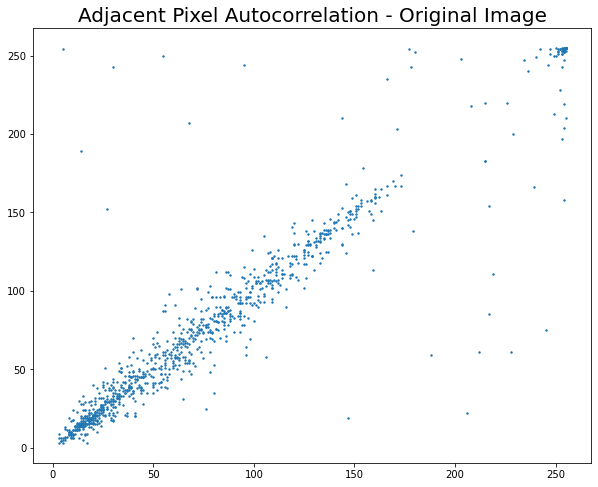

In [47]:
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero'
ext = ".png"

# DISPLAYING IMAGE

img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
plt.imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

# HISTOGRAM

# First we need to split the image into channels of Red, Green, Blue 
# Select the Histogram Size = 256
# Select the Histogram Range = (0,256)

# SYNTAX FOR calHist
#calcHist(image, channel, None, Histogram_Size, Histogram_Range)

#Plotting Blue Channel (NOTE : IN OPENCV THE COLOR FORMAT IS 'BGR')
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')

#Plotting Green Channel
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green')

#Plotting Red Channel
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 

plt.title('Intensity Histogram - Original Image', fontsize=20) # Adding Title
plt.xlabel('pixel values', fontsize=16) # Adding X-Axis
plt.ylabel('pixel count', fontsize=16) # Adding Y-Axis
plt.show() # SHOW


# CORRELATION

ImageMatrix,image_size = getImageMatrix_gray(image+ext) # Getting image matrix

samples_x = []
samples_y = []

for i in range(1000): # Selecting 1000 points 
  x = random.randint(0,image_size-2) # Gives random value 
  y = random.randint(0,image_size-1) # Gives random value
    
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y]) # comparing horizontally, for vertical comparision [x][y+1], for diagonal [x+1][y+1]

plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

## Encrypted Image

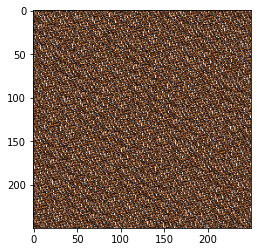

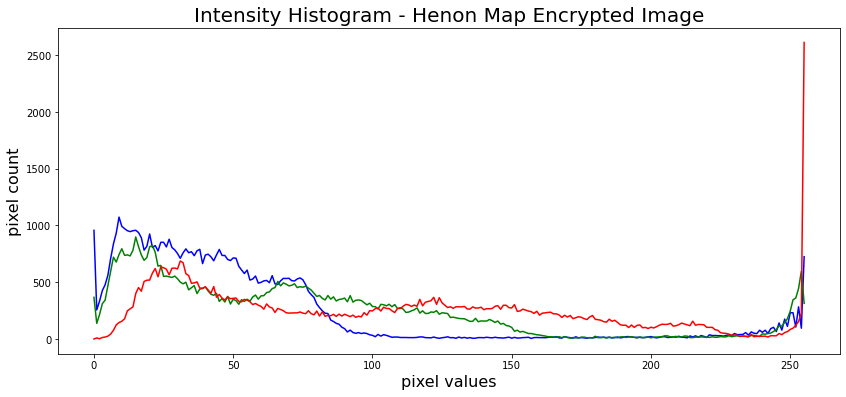

250


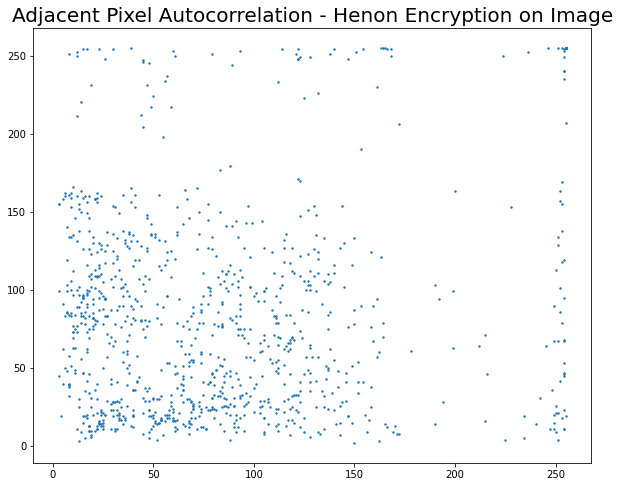

In [48]:
image = r'C:\Users\Janardhan\Desktop\Image-Cryptography\HorizonZero_ArnoldcatEnc'
ext = ".png"

# DISPLAYING IMAGE 

img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
plt.imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

# HISTOGRAM

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Henon Map Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# CORRELATION

ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1000):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-2)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Henon Encryption on Image', fontsize=20)
plt.show()